In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.simplefilter("ignore")

In [2]:
final_merged_data=pd.read_csv('final_merged_data.csv')

In [3]:
y = final_merged_data.PotentialFraud
X = final_merged_data.drop('PotentialFraud',axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 42 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Provider                            558211 non-null  object 
 1   InscClaimAmtReimbursed              558211 non-null  int64  
 2   AttendingPhysician                  558211 non-null  object 
 3   OperatingPhysician                  558211 non-null  object 
 4   OtherPhysician                      558211 non-null  object 
 5   ClmAdmitDiagnosisCode               558211 non-null  object 
 6   DeductibleAmtPaid                   558211 non-null  float64
 7   DiagnosisGroupCode                  558211 non-null  int64  
 8   days_admitted                       558211 non-null  float64
 9   Claim_duration                      558211 non-null  float64
 10  Extra_days_claimed                  558211 non-null  float64
 11  was_admitted              

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 374,001
Test samples: 184,210


In [5]:
all_toshow_df = {"Select Algorithm":" "}

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report
import warnings

cats  = ['Gender', 'Race', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'Provider',' AttendingPhysician', 'OperatingPhysician','OtherPhysician', 'ClmAdmitDiagnosisCode','DiagnosisGroupCode',
         ]
nums =['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'days_admitted', 'Claim_duration', 'Extra_days_claimed', 'was_admitted', 'RenalDiseaseIndicator',   'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'is_dead', 'Patient_Risk_Score', 'Total_ip_op_AnnualReimbursementAmt', 'Total_ip_op_AnnualDeductibleAmt', 'Total_physicans_attended', 'Total_ClmDiagnosisCode', 'Total_ClmProcedureCode'
       ]
num_pipeline = Pipeline([('standardize_num', StandardScaler())])

cat_pipeline = Pipeline([('create_dummies_cats', OneHotEncoder(handle_unknown='ignore',  sparse=False))])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, nums),
                                                      ('create_dummies', cat_pipeline, cats)])

print('Pipeline Created')

Pipeline Created


## Logistic Regression

In [7]:
pipe1 = Pipeline([('processing', processing_pipeline),
    ('mnl', LogisticRegression(fit_intercept=True,max_iter=1000))])

ml= pipe1.fit(X_train, y_train)

In [8]:
from sklearn.metrics import confusion_matrix

y_testlr = ml.predict(X_test)

print(confusion_matrix(y_test, y_testlr))

[[111261   3106]
 [ 21576  48267]]


In [9]:
y_testlr = ml.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testlr))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90    114367
           1       0.94      0.69      0.80     69843

    accuracy                           0.87    184210
   macro avg       0.89      0.83      0.85    184210
weighted avg       0.88      0.87      0.86    184210



In [10]:
y_testlr= ml.predict(X_test)
print(f1_score(y_test, y_testlr))

0.7963800158394932


In [11]:
lr_toshow_df = X_test.copy()
lr_toshow_df['Real'] = y_test
lr_toshow_df['Pred'] = y_testlr
lr_toshow_df=lr_toshow_df.reset_index(drop=True)

In [12]:
all_toshow_df["Logistic Regression"] = lr_toshow_df

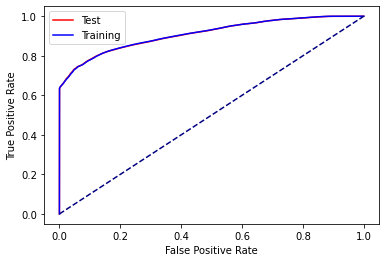

In [13]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=ml):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [14]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_probs(X_test))

0.9097779903380089

## Logistic Regression with hyperparameter tuning

In [15]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GroupKFold
#cv = GroupKFold(n_splits=10)

                            

param_grid = [{'mnl__penalty': ['l1', 'l2'],
               'mnl__C':np.logspace(-3,3,7)
            }]

f1_scorer = make_scorer(f1_score)
gridlr = GridSearchCV(estimator = pipe1, param_grid=param_grid, n_jobs=2,refit='neg_log_loss', cv=3, verbose=2, scoring = f1_scorer, return_train_score=True)

gridlr = gridlr.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


In [16]:
gridlr.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('standardize_num',
                                                                   StandardScaler())]),
                                                  ['InscClaimAmtReimbursed',
                                                   'DeductibleAmtPaid',
                                                   'days_admitted',
                                                   'Claim_duration',
                                                   'Extra_days_claimed',
                                                   'was_admitted',
                                                   'RenalDiseaseIndicator',
                                                   'ChronicCond_Alzheimer',
                                                   'ChronicCond_Heartfailure',
                                                   'ChronicCond_KidneyDi

In [17]:
gridlr.best_params_

{'mnl__C': 0.001, 'mnl__penalty': 'l2'}

In [18]:
from sklearn.metrics import confusion_matrix

y_testlr = gridlr.predict(X_test)

print(confusion_matrix(y_test, y_testlr))

[[111324   3043]
 [ 21613  48230]]


In [19]:
y_testlr = gridlr.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testlr))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90    114367
           1       0.94      0.69      0.80     69843

    accuracy                           0.87    184210
   macro avg       0.89      0.83      0.85    184210
weighted avg       0.88      0.87      0.86    184210



In [20]:
from sklearn.metrics import f1_score
y_testlr = gridlr.predict(X_test)
print(f1_score(y_test, y_testlr))

0.7964265662670497


## Decision Tree

In [21]:
pipe2 = Pipeline([('processing', processing_pipeline),
    ('dt_classifier', DecisionTreeClassifier(random_state=0))])
mdt= pipe2.fit(X_train, y_train)

In [22]:
from sklearn.metrics import confusion_matrix

y_testp_dt = mdt.predict(X_test)

print(confusion_matrix(y_test, y_testp_dt))

[[100148  14219]
 [ 13048  56795]]


In [23]:
y_testp_dt = mdt.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp_dt))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88    114367
           1       0.80      0.81      0.81     69843

    accuracy                           0.85    184210
   macro avg       0.84      0.84      0.84    184210
weighted avg       0.85      0.85      0.85    184210



In [24]:
from sklearn.metrics import f1_score
y_testp_dt = mdt.predict(X_test)
print(f1_score(y_test, y_testp_dt))

0.8064206961670346


In [25]:
dt_toshow_df = X_test.copy()
dt_toshow_df['Real'] = y_test
dt_toshow_df['Pred'] = y_testp_dt
dt_toshow_df=dt_toshow_df.reset_index(drop=True)

In [26]:
all_toshow_df["Decision Tree"] = dt_toshow_df

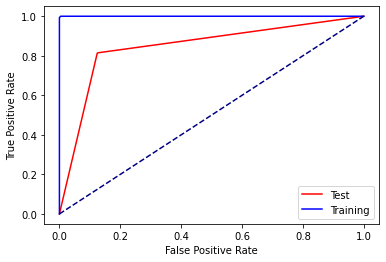

In [27]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=mdt):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [28]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_probs(X_test))

0.8450712575090571

## Hyperparameter tuning of decision Tree

In [29]:
from sklearn.model_selection import GridSearchCV
params = {
    'dt_classifier__max_depth': [10,50]
}
f1_scorer = make_scorer(f1_score)
grid_dt= GridSearchCV(estimator=pipe2, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = f1_scorer)
griddt=grid_dt.fit(X_train, y_train)
griddt.score(X_test, y_test)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


0.8381747089931236

In [30]:
griddt.best_params_

{'dt_classifier__max_depth': 50}

In [31]:
from sklearn.metrics import confusion_matrix

y_testp_dt = griddt.predict(X_test)

print(confusion_matrix(y_test, y_testp_dt))

[[106657   7710]
 [ 13894  55949]]


In [32]:
y_testp_dt= griddt.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp_dt))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91    114367
           1       0.88      0.80      0.84     69843

    accuracy                           0.88    184210
   macro avg       0.88      0.87      0.87    184210
weighted avg       0.88      0.88      0.88    184210



In [33]:
from sklearn.metrics import f1_score
y_testp_dt= griddt.predict(X_test)
print(f1_score(y_test,y_testp_dt))

0.8381747089931236


In [34]:
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 04:13:00


## Random Forest

In [35]:
pipe3 = Pipeline([('processing', processing_pipeline),
    ('rf_classifier', RandomForestClassifier(random_state=0,max_samples=4000))])
mrf= pipe3.fit(X_train, y_train)

In [36]:
from sklearn.metrics import confusion_matrix

y_testpr_rf = mrf.predict(X_test)

print(confusion_matrix(y_test, y_testpr_rf))

[[110051   4316]
 [ 20808  49035]]


In [37]:
y_testpr_rf = mrf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testpr_rf))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90    114367
           1       0.92      0.70      0.80     69843

    accuracy                           0.86    184210
   macro avg       0.88      0.83      0.85    184210
weighted avg       0.87      0.86      0.86    184210



In [38]:
from sklearn.metrics import f1_score
y_testpr_rf = mrf.predict(X_test)
print(f1_score(y_test, y_testpr_rf))

0.796061496501453


In [39]:
rf_toshow_df = X_test.copy()
rf_toshow_df['Real'] = y_test
rf_toshow_df['Pred'] = y_testpr_rf
rf_toshow_df=rf_toshow_df.reset_index(drop=True)

In [40]:
all_toshow_df[ "Random Forest"] = rf_toshow_df

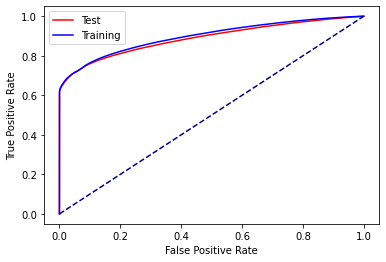

In [41]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=mrf):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [42]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_probs(X_test))

0.8883525767179614

## Hyper parameter tuning of random forest classifier

In [43]:
params = {'rf_classifier__max_depth': [300,400]
              
       }
f1_scorer = make_scorer(f1_score)
rf_reg_tuned = GridSearchCV(estimator=pipe3,
                            param_grid=params,refit=True,
                            scoring =f1_scorer )

rf_reg_tuned.fit(X_train, y_train)
rf_reg_tuned.score(X_test, y_test)

0.796061496501453

In [44]:
rf_reg_tuned.best_params_

{'rf_classifier__max_depth': 300}

In [45]:
from sklearn.metrics import confusion_matrix

y_testpr_rf = rf_reg_tuned.predict(X_test)

print(confusion_matrix(y_test, y_testpr_rf))

[[110051   4316]
 [ 20808  49035]]


In [46]:
y_testpr_rf = rf_reg_tuned.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testpr_rf))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90    114367
           1       0.92      0.70      0.80     69843

    accuracy                           0.86    184210
   macro avg       0.88      0.83      0.85    184210
weighted avg       0.87      0.86      0.86    184210



In [47]:
from sklearn.metrics import f1_score
y_testp = rf_reg_tuned.predict(X_test)
print(f1_score(y_test, y_testp))

0.796061496501453


In [48]:
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 04:16:33


## XG Boost

In [49]:
! pip install xgboost

In [50]:
pipe4 = Pipeline([('processing', processing_pipeline),
    ('xgb_classifier', XGBClassifier(random_state=0))])
mxgb= pipe4.fit(X_train, y_train)

In [51]:
from sklearn.metrics import confusion_matrix

y_testpr_xg = mxgb.predict(X_test)

print(confusion_matrix(y_test, y_testpr_xg))

[[111362   3005]
 [ 18378  51465]]


In [52]:
y_testpr_xg = mxgb.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testpr_xg))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91    114367
           1       0.94      0.74      0.83     69843

    accuracy                           0.88    184210
   macro avg       0.90      0.86      0.87    184210
weighted avg       0.89      0.88      0.88    184210



In [53]:
from sklearn.metrics import f1_score
y_testpr_xg = mxgb.predict(X_test)
print(f1_score(y_test, y_testpr_xg))

0.8279906365384152


In [54]:
xgb_toshow_df = X_test.copy()
xgb_toshow_df['Real'] = y_test
xgb_toshow_df['Pred'] = y_testpr_xg
xgb_toshow_df=xgb_toshow_df.reset_index(drop=True)

In [55]:
all_toshow_df["XG Boost"] = xgb_toshow_df

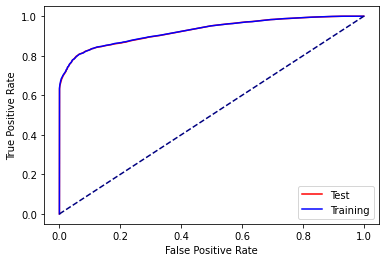

In [56]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=mxgb):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [57]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_probs(X_test))

0.9269678049901594

## Hyper parameter tuning of Xgboost Classifier

In [58]:
params = {'xgb_classifier__n_estimators': [100,105]
       }
f1_scorer = make_scorer(f1_score)
xgb_tuned = GridSearchCV(estimator=pipe4,
                            param_grid=params,refit=True,
                            scoring =f1_scorer )

xgb_tuned.fit(X_train, y_train)
xgb_tuned.score(X_test, y_test)

0.8283951312518603

In [59]:
xgb_tuned.best_params_

{'xgb_classifier__n_estimators': 105}

In [60]:
from sklearn.metrics import confusion_matrix

y_testpr_xgb = xgb_tuned.predict(X_test)

print(confusion_matrix(y_test, y_testpr_xgb))

[[111393   2974]
 [ 18357  51486]]


In [61]:
y_testpr_xgb = xgb_tuned.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testpr_xgb))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91    114367
           1       0.95      0.74      0.83     69843

    accuracy                           0.88    184210
   macro avg       0.90      0.86      0.87    184210
weighted avg       0.89      0.88      0.88    184210



In [62]:
from sklearn.metrics import f1_score
y_testp = xgb_tuned.predict(X_test)
print(f1_score(y_test, y_testp))

0.8283951312518603


## Extra Trees Classifier

In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [64]:
pipe5 = Pipeline([('processing', processing_pipeline),
    ('et_classifier',  ExtraTreesClassifier(random_state=0))])
met= pipe5.fit(X_train, y_train)

In [65]:
from sklearn.metrics import confusion_matrix

y_testpr_et = met.predict(X_test)

print(confusion_matrix(y_test,  y_testpr_et))

[[106372   7995]
 [ 13683  56160]]


In [66]:
y_testpr_et = met.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testpr_et))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91    114367
           1       0.88      0.80      0.84     69843

    accuracy                           0.88    184210
   macro avg       0.88      0.87      0.87    184210
weighted avg       0.88      0.88      0.88    184210



In [67]:
from sklearn.metrics import f1_score
y_testpr_et = met.predict(X_test)
print(f1_score(y_test, y_testpr_et))

0.8382214659920297


In [68]:
extt_toshow_df = X_test.copy()
extt_toshow_df['Real'] = y_test
extt_toshow_df['Pred'] = y_testpr_et
extt_toshow_df=extt_toshow_df.reset_index(drop=True)

In [69]:
all_toshow_df["Extra Tree"] = extt_toshow_df

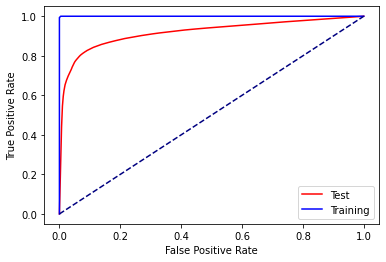

In [70]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=met):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_probs(X_test))

0.9183352281904076

## Hyperparameter tuning of Extra Tree Classifier

In [72]:
params = {'et_classifier__criterion': ['gini','entropy']
               
       }
f1_scorer = make_scorer(f1_score)
et_tuned = GridSearchCV(estimator=pipe5,
                            param_grid=params,refit=True,
                            scoring =f1_scorer )

et_tuned.fit(X_train, y_train)
et_tuned.score(X_test, y_test)

0.8388001372294567

In [73]:
et_tuned.best_params_

{'et_classifier__criterion': 'entropy'}

In [74]:
from sklearn.metrics import confusion_matrix

y_testpr_et = et_tuned.predict(X_test)

print(confusion_matrix(y_test, y_testpr_et))

[[106362   8005]
 [ 13609  56234]]


In [75]:
y_testpr_et= et_tuned.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_testpr_et ))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91    114367
           1       0.88      0.81      0.84     69843

    accuracy                           0.88    184210
   macro avg       0.88      0.87      0.87    184210
weighted avg       0.88      0.88      0.88    184210



In [76]:
from sklearn.metrics import f1_score
y_testpr_et = et_tuned.predict(X_test)
print(f1_score(y_test, y_testpr_et))

0.8388001372294567


## Ada boost

In [77]:
pipe6 = Pipeline([('processing', processing_pipeline),
    ('ab_classifier',  AdaBoostClassifier(random_state=0))])
m= pipe6.fit(X_train, y_train)

In [78]:
from sklearn.metrics import confusion_matrix

y_testpr_ab = m.predict(X_test)

print(confusion_matrix(y_test,  y_testpr_ab))

[[113814    553]
 [ 25486  44357]]


In [79]:
y_testpr_ab = m.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testpr_ab))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90    114367
           1       0.99      0.64      0.77     69843

    accuracy                           0.86    184210
   macro avg       0.90      0.82      0.84    184210
weighted avg       0.88      0.86      0.85    184210



In [80]:
from sklearn.metrics import f1_score
y_testpr_ab = m.predict(X_test)
print(f1_score(y_test, y_testpr_ab))

0.773086542399763


In [81]:
adb_toshow_df = X_test.copy()
adb_toshow_df['Real'] = y_test
adb_toshow_df['Pred'] = y_testpr_ab
#adb_toshow_df=adb_toshow_df[20:30]
adb_toshow_df=adb_toshow_df.reset_index(drop=True)

In [82]:
all_toshow_df["Ada Boost"] = adb_toshow_df

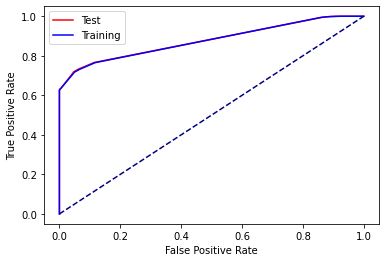

In [83]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=m):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [84]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_probs(X_test))

0.8774668851247572

## Hyperparameter tuning of Adaboost

In [85]:
params = {
               'ab_classifier__n_estimators': [105]
         }
f1_scorer = make_scorer(f1_score)
ab_tuned = GridSearchCV(estimator=pipe6,
                            param_grid=params,refit=True,
                            scoring =f1_scorer )

ab_tuned.fit(X_train, y_train)
ab_tuned.score(X_test, y_test)

0.796893862768769

In [86]:
ab_tuned.best_params_

{'ab_classifier__n_estimators': 105}

In [87]:
from sklearn.metrics import confusion_matrix

y_testpr_ab = ab_tuned.predict(X_test)

print(confusion_matrix(y_test, y_testpr_ab))

[[110462   3905]
 [ 20995  48848]]


In [88]:
y_testpr_ab = ab_tuned.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_testpr_ab))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90    114367
           1       0.93      0.70      0.80     69843

    accuracy                           0.86    184210
   macro avg       0.88      0.83      0.85    184210
weighted avg       0.87      0.86      0.86    184210



In [89]:
from sklearn.metrics import f1_score
y_testpr_ab= ab_tuned.predict(X_test)
print(f1_score(y_test, y_testpr_ab))

0.796893862768769


In [90]:
import pickle
file = open('to_show_df.pkl', 'wb')
pickle.dump(all_toshow_df, file)                     
file.close()

## Visual Comparisions

In [100]:
comp_model_performence = pd.DataFrame()
ml_model = ['LR','DT','RF','XG','ET','ADB']
f1_score = [0.7963,0.8064,0.7960,0.8279,0.8382,0.7730]
roc_auc_score = [0.9097,0.8450,0.8883,0.9269,0.9183,0.8774]

comp_model_performence['ML_Model']=ml_model
comp_model_performence['f1_score']=f1_score
comp_model_performence['roc_auc_score']=roc_auc_score
comp_model_performence

,ML_Model,f1_score
0,LR,0.7963
1,DT,0.8064
2,RF,0.7960
3,XG,0.8279
4,ET,0.8382
5,ADB,0.7730


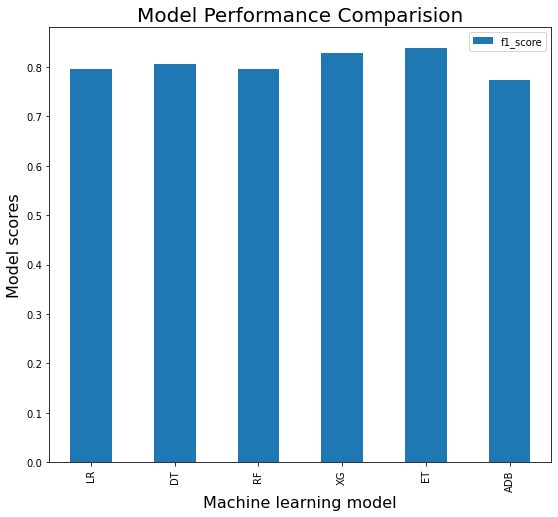

In [98]:
comp_model_performence.plot(x="ML_Model", y=["f1_score"], kind="bar", figsize=(9, 8))
plt.xlabel('Machine learning model',size=16)
plt.ylabel('Model scores',size=16)
plt.title('Model Performance Comparision',size=20)
plt.show()

In [99]:
tuned_df = pd.DataFrame()
ml_model = ['LR','DT','RF','XG','ET','ADB']
f1_score = [0.7964,0.8381,0.7960,0.8283,0.8388,0.7968]
tuned_df['ML_Model']=ml_model

tuned_df['f1_score']=f1_score
tuned_df 

,ML_Model,f1_score
0,LR,0.7964
1,DT,0.8381
2,RF,0.7960
3,XG,0.8283
4,ET,0.8388
5,ADB,0.7968


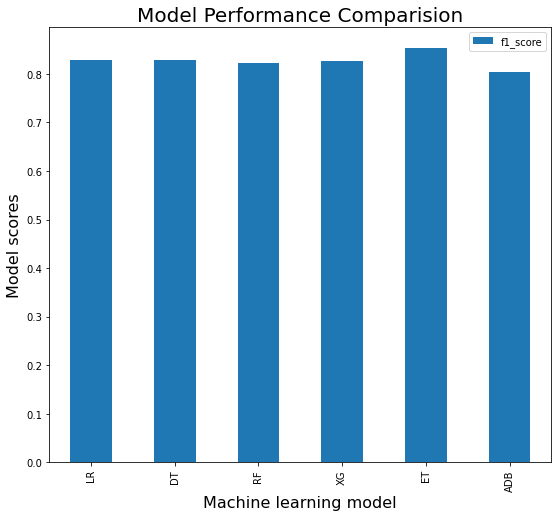

In [94]:
tuned_df.plot(x="ML_Model", y=["f1_score"], kind="bar", figsize=(9, 8))
plt.xlabel('Machine learning model',size=16)
plt.ylabel('Model scores',size=16)
plt.title('Model Performance Comparision',size=20)
plt.show()

In [107]:
all_toshow_df

{'Select Algorithm': ' ',
 'Logistic Regression':         Provider  InscClaimAmtReimbursed AttendingPhysician  \
 0        PRV0000                      60            PHY0000   
 1       PRV54742                       0            PHY0000   
 2       PRV52059                      10            PHY0000   
 3        PRV0000                      40            PHY0000   
 4        PRV0000                      30            PHY0000   
 ...          ...                     ...                ...   
 184205  PRV51347                     400            PHY0000   
 184206   PRV0000                     800            PHY0000   
 184207  PRV56689                      10            PHY0000   
 184208   PRV0000                     300            PHY0000   
 184209   PRV0000                    1300            PHY0000   
 
        OperatingPhysician OtherPhysician ClmAdmitDiagnosisCode  \
 0                       0       PHY12345                     0   
 1                       0      PHY335146      